# Celebrity Naming

### import modules

In [3]:
import os
import fnmatch

import numpy as np
import pandas as pd

### get logfiles

In [4]:
def getLogfile(whichfolder, whichexperiment):

    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            loglist.append(whichfolder+fileName)
    loglist.sort()
    return loglist

In [7]:
logList = getLogfile('../famousInner/experiment/data/','*.csv')

In [8]:
logList[-5:]

['../famousInner/experiment/data/6_famFaceGrey_2017_Jan_27_1016.csv',
 '../famousInner/experiment/data/7_famFaceGrey_2017_Jan_30_1434.csv',
 '../famousInner/experiment/data/8_famFaceGrey_2017_Feb_01_1624.csv',
 '../famousInner/experiment/data/9_famFaceGrey_2017_Feb_02_1225.csv',
 '../famousInner/experiment/data/jb_famFaceGrey_2016_Nov_23_1406.csv']

### get logfile into df

In [9]:
def makeDf(csvFile):
    df = pd.read_csv(csvFile,index_col=[0],header=0)
    thisDf = pd.concat([df['pic'], df['inputText'] ],axis=1)
    thisDf.columns = ['filename','text']
    #thisDf = thisDf.dropna()
    return thisDf.loc[thisDf.index[1:]]

In [10]:
thisDf = makeDf(logList[-1])

In [11]:
thisDf.head()

,filename,text
num,,
87.0,./greyInner/Ice-T(OdafinFinTutuola)12_1_cut.png,Law und order
166.0,./greyInner/RobertSeanLeonard(Wilson)1_1_cut.png,Wilson
77.0,./greyInner/GeorgeClooney15_1_cut.png,NaN
112.0,./greyInner/JoshRadnor(Ted)3_1_cut.png,NaN
156.0,./greyInner/NicoleKidman14_1_cut.png,Nicole Kidman


### checking if naming is correct (does not take typos,nicknames,abbrevations etc. into account)

In [12]:
def firstRoughCheck(thisDf):
    d = {}
    for entry in thisDf.index:
        thisEntry = thisDf.loc[entry]
        #print thisEntry
        fileName = str(thisEntry.filename).lower()
        try:
            ans = str(thisEntry.text).lower()
        except:
            #print thisEntry.text
            ans = '9999999999'
        d[entry] = 0
        for subentry in ans.split():
            if subentry in fileName:
                d[entry] = 1
                
    df = pd.DataFrame(d,index=['hit']).T   
    autoDf = pd.concat([thisDf,df],axis=1)
    return autoDf

In [13]:
autoDf = firstRoughCheck(thisDf)

In [14]:
autoDf.head()

,filename,text,hit
1.0,./greyInner/AlysonHannigan(Lily)1_1_cut.png,Lily,1
2.0,./greyInner/AlysonHannigan(Lily)12_2_cut.png,Lily,1
3.0,./greyInner/AlysonHannigan(Lily)14_2_cut.png,Lily,1
4.0,./greyInner/AlysonHannigan(Lily)5_4_cut.png,Lily,1
5.0,./greyInner/AlysonHannigan(Lily)8_3_cut.png,Lily,1


In [15]:
autoDf.shape

(224, 3)

### load file checking familiarity with celebrities and eliminate unfamiliar

In [16]:
pName = 'jb'

In [17]:
checkDf = pd.read_csv('../famousCheck/output/famousFamiliarity_%s.csv' % pName)

In [18]:
checkDf

,img,name,bekannt
0,./img/Beyonce2.jpg,Beyoncé,ja
1,./img/AlysonHannigan(Lily)1.jpg,Alyson Hannigan,ja
2,./img/RobertSeanLeonard(Wilson)2.jpg,Robert Sean Leonard,ja
3,./img/GuentherJauch2.jpg,Günther Jauch,ja
4,./img/JimParsons(SheldonCooper)1.jpg,Jim Parsons,ja
5,./img/SigmarGabriel1.jpg,Sigmar Gabriel,ja
6,./img/Shakira1.jpg,Shakira,ja
7,./img/SahraWagenknecht6.jpg,Sahra Wagenknecht,ja
8,./img/NicoleKidman4.jpg,Nicole Kidman,ja
9,./img/TaylorSwift1.jpg,Taylor Swift,nein


### search for people who are not familiar:

In [23]:
def cleanUp(autoDf,checkDf):
    newDf = autoDf.copy()
    for know in checkDf.index:
        thisName = checkDf.loc[know]['name']
        thisSplit = thisName.lower().split()

        try:
            thisShort = '%s%s' % tuple(thisSplit[:2])
        except:
            thisShort = '%s' % tuple(thisSplit[:])

        thisCheck = checkDf.loc[know]['bekannt']
        if thisCheck == 'nein':
            print 'who is %s???' % thisName
            for entry in newDf.index:
                if thisShort in newDf.loc[entry]['filename'].lower():
                    #print thisShort, newDf.loc[entry]['filename']
                    newDf = newDf.drop(entry)
                    
    # get rid of the unfamous
    for entry in newDf.index:
        if 'notfamous' in newDf.loc[entry]['filename']:
            newDf = newDf.drop(entry)

    return newDf

In [24]:
cleanDf = cleanUp(autoDf,checkDf)

who is Taylor Swift???
who is Emma Watson???
who is Benedict Cumberbatch???
who is Usher???
who is Cristin Milioti???


In [25]:
cleanDf.tail()

,filename,text,hit
206.0,./greyInner/WillSmith1_1_cut.png,Will Smith,1
207.0,./greyInner/WillSmith14_1_cut.png,Will Smith,1
208.0,./greyInner/WillSmith4_1_cut.png,Will Smith,1
209.0,./greyInner/WillSmith5_1_cut.png,Will Smith,1
210.0,./greyInner/WillSmith6_1_cut.png,Will Smith,1


In [26]:
cleanDf.shape

(185, 3)

### check incorrect answers for typos

In [27]:
def showIncorrect(cleanDf):
    dummyDict = {}
    cleanerDf = cleanDf.copy()
    for entry in cleanerDf.index:
        thisEntry = cleanerDf.loc[entry]
        if thisEntry.hit == 0 and str(thisEntry.text) != 'nan':
                dummyDict[entry] = {'filename':thisEntry.filename,'text':thisEntry.text}
    return pd.DataFrame(dummyDict).T

In [28]:
showIncorrect(cleanDf)

,filename,text
39.0,./greyInner/CarenMiosga6_2_cut.png,Kate Winslett
42.0,./greyInner/CobieSmulders(Robin)2_1_cut.png,Mariska
51.0,./greyInner/DannFlorek(DonaldDonCragen)1_1_cut...,Chef bei Law und Order
61.0,./greyInner/EmilyDeschanel15_1_cut.png,Bones
62.0,./greyInner/EmilyDeschanel3_1_cut.png,Bones
63.0,./greyInner/EmilyDeschanel5_1_cut.png,Bones
64.0,./greyInner/EmilyDeschanel6_12_cut.png,eine von Spice Girls
65.0,./greyInner/EmilyDeschanel8_3_cut.png,Bones
76.0,./greyInner/GeorgeClooney11_1_cut.png,Charlie Sheen
86.0,./greyInner/Ice-T(OdafinFinTutuola)10_1_cut.png,Law und Order


Above, we see that some of the incorrect answers are in fact correct. The character name of Emiliy Deschanel is Bones and Loew and Löw are the same thing.

## Do this for one participant

In [29]:
def makePreliminary(logFile):

    pName = logFile.split('/')[-1].split('_')[0]

    thisDf = makeDf(logFile)
    autoDf = firstRoughCheck(thisDf)
    checkDf = pd.read_csv('../famousInner/experiment/data/famousFamiliarity_%s.csv' % pName)
    cleanDf = cleanUp(autoDf,checkDf)
    
    cleanDf = cleanDf.sort_values(by='hit').sort_values(by='text')
    outDf = cleanDf.to_csv('../famousInner/experiment/data/famousFacesClean_%s.csv' % pName)
    return

This should only be run the very first time. Later, we check the resulting data by hand, so we must not overwrite these hand-corrected results by re-running this function.

In [30]:
#makePreliminary(logList[-1])

### do this for all participants

In [31]:
#for logFile in logList:
#    print '\n############# %s #############\n' % logFile
#    makePreliminary(logFile)

### Correct the logfiles by hand

After the automated rough cleanup, all logfiles have been re-evaluated by hand, because sometimes there are minor typos and sometimes the names of roles the actors played instead of their actual names are used (we consider both to be correct). So the following data have been checked by hand and not just processed with the previous scripts.

## Re-load all hand-corrected answers

In [32]:
checkedList = getLogfile('../famousInner/dataClean/','famousFacesClean*.csv')

In [33]:
checkedList[-5:]

['../famousInner/dataClean/famousFacesClean_6_u.csv',
 '../famousInner/dataClean/famousFacesClean_7_u.csv',
 '../famousInner/dataClean/famousFacesClean_8_u.csv',
 '../famousInner/dataClean/famousFacesClean_9_u.csv',
 '../famousInner/dataClean/famousFacesClean_jb_u.csv']

In [34]:
showIncorrect( pd.read_csv(checkedList[-1],index_col=[0],delimiter=';') )

,filename,text
39,./greyInner/CarenMiosga6_2_cut.png,Kate Winslett
42,./greyInner/CobieSmulders(Robin)2_1_cut.png,Mariska
51,./greyInner/DannFlorek(DonaldDonCragen)1_1_cut...,Chef bei Law und Order
64,./greyInner/EmilyDeschanel6_12_cut.png,eine von Spice Girls
76,./greyInner/GeorgeClooney11_1_cut.png,Charlie Sheen
86,./greyInner/Ice-T(OdafinFinTutuola)10_1_cut.png,Law und Order
87,./greyInner/Ice-T(OdafinFinTutuola)12_1_cut.png,Law und order
88,./greyInner/Ice-T(OdafinFinTutuola)5_1_cut.png,Law und Order
89,./greyInner/Ice-T(OdafinFinTutuola)6_1_cut.png,Law und Order
90,./greyInner/Ice-T(OdafinFinTutuola)7_1_cut.png,Law und Order


Above we see the same table as before, but after correction by hand.

### show what incorrect responses are left (excluding no responses)

In [35]:
def showWhatsLeft(df):
    copyDf = df.copy()
    
    dummyDict = {}
    for entry in df.index:
        thisEntry = df.loc[entry]
        if thisEntry.hit == 0 and str(thisEntry.text) != 'nan':
            dummyDict[entry] = {'filename':thisEntry.filename,'text':thisEntry.text}
    
    printDf = pd.DataFrame(dummyDict).T
    
    for idx in printDf.index:
        print '%s\t%s' % (printDf.loc[idx].filename,printDf.loc[idx].text)

In [36]:
for entry in checkedList:
    print '\n############# %s #############\n' % entry
    thisLog = entry
    thisDf = pd.read_csv(thisLog,index_col=[0],delimiter=';')
    showWhatsLeft(thisDf)


############# ../famousInner/dataClean/famousFacesClean_10_u.csv #############

./greyInner/LisaEdelstein(DrLisaCuddy)2_2_cut.png	chefin von house
./greyInner/OmarEpps(DrEricForeman)1_5_cut.png	dr house untertan
./greyInner/Shakira3_1_cut.png	beyonce
./greyInner/Shakira7_1_cut.png	beyonce
./greyInner/Shakira9_1_cut.png	die aus sin city
./greyInner/UrsulavonderLeyen1_1_cut.png	hillary
./greyInner/UrsulavonderLeyen4_1_cut.png	hillary clinton

############# ../famousInner/dataClean/famousFacesClean_11_u.csv #############

./greyInner/BastianSchweinsteiger1_1_cut.png	Fußballspieler
./greyInner/BastianSchweinsteiger12_1_cut.png	Fußballspieler
./greyInner/BastianSchweinsteiger14_1_cut.png	In Fußball
./greyInner/BastianSchweinsteiger3_1_cut.png	Fußballspieler
./greyInner/BastianSchweinsteiger6_2_cut.png	Fußbalspieler
./greyInner/GeorgeClooney4_2_cut.png	Berad pit
./greyInner/JoachimLoew1_1_cut.png	Fußballtrainer
./greyInner/JoachimLoew15_1_cut.png	Trainer
./greyInner/JoachimLoew4_1_cut.png	F

./greyInner/AlysonHannigan(Lily)1_1_cut.png	How I met your Mother
./greyInner/AlysonHannigan(Lily)14_2_cut.png	Himym
./greyInner/AlysonHannigan(Lily)5_4_cut.png	how I met your mother
./greyInner/AlysonHannigan(Lily)8_3_cut.png	How I met your mother
./greyInner/CobieSmulders(Robin)12_1_cut.png	die andere aus How I met your mother
./greyInner/CobieSmulders(Robin)2_1_cut.png	die andere aus How I met your Mother
./greyInner/CobieSmulders(Robin)3_4_cut.png	die andere aus How I met your mother
./greyInner/CobieSmulders(Robin)4_7_cut.png	how I met your Mother
./greyInner/EmilyDeschanel15_1_cut.png	aus einer amerikanischen Serie irgendwas mit Vampieren
./greyInner/JanHofer5_1_cut.png	Moderator von Hart aber fair
./greyInner/JasonSegel(Marshall)11_1_cut.png	aus Dem Film Bad teacher der Sportlehrer
./greyInner/JasonSegel(Marshall)14_1_cut.png	amerikanische Serie
./greyInner/JasonSegel(Marshall)6_1_cut.png	amerikanische Serie
./greyInner/JasonSegel(Marshall)7_1_cut.png	aus einer amerikanischen 

./greyInner/AlysonHannigan(Lily)1_1_cut.png	american pie
./greyInner/AlysonHannigan(Lily)12_2_cut.png	Amercian Pie
./greyInner/AlysonHannigan(Lily)14_2_cut.png	Amercian Pie
./greyInner/AlysonHannigan(Lily)5_4_cut.png	Amercian Pie
./greyInner/AlysonHannigan(Lily)8_3_cut.png	American Pie
./greyInner/CobieSmulders(Robin)12_1_cut.png	HIMYM
./greyInner/CobieSmulders(Robin)2_1_cut.png	Himym
./greyInner/CobieSmulders(Robin)4_7_cut.png	Himym
./greyInner/CobieSmulders(Robin)5_1_cut.png	Himym
./greyInner/EmmaWatson(HermioneGranger)16_1_cut.png	Emma Stone
./greyInner/EmmaWatson(HermioneGranger)4_1_cut.png	Emma Stone
./greyInner/EmmaWatson(HermioneGranger)9_1_cut.png	Emma stone
./greyInner/JasonSegel(Marshall)7_1_cut.png	Himym
./greyInner/JudithRakers1_1_cut.png	Nazan Eckes
./greyInner/KatjaBurkard4_1_cut.png	Punkt 12
./greyInner/KatjaBurkard5_3_cut.png	punkt 12
./greyInner/Shakira1_1_cut.png	Scrubs
./greyInner/Shakira7_1_cut.png	Beyonce Knowles

############# ../famousInner/dataClean/famousFace

### Split df into identities JB claims to be able to identify by face alone and the rest

In [48]:
jbRecogDf = pd.read_csv('../famousCheck/recognizableList.csv')

In [49]:
def makeRecogSplit(thisDf,jbRecogDf=jbRecogDf):
    
    df = thisDf.copy()
    
    # for each entry in the response df
    for i in df.index:
        thisName = df.loc[i]['filename']
        # for each name in the recoglist
        for j in jbRecogDf.index:
            thisRecog = jbRecogDf.loc[j]['name']
            thisStatus = jbRecogDf.loc[j]['recognizable']
            # if the names match
            if thisRecog in thisName:
                # set the status of the 
                df.set_value(i,'jbRecog',thisStatus)
           
    return df

In [50]:
splitDf = makeRecogSplit(thisDf)

In [51]:
splitDf.tail()

,filename,text,hit,jbRecog
54,./greyInner/DannFlorek(DonaldDonCragen)5_1_cut...,NaN,0,JB
57,./greyInner/ElvisPresley2_1_cut.png,NaN,0,JB
58,./greyInner/ElvisPresley4_10_cut.png,NaN,0,JB
59,./greyInner/ElvisPresley5_2_cut.png,NaN,0,JB
56,./greyInner/ElvisPresley1_1_cut.png,NaN,0,JB


In [52]:
splitDf.groupby('jbRecog').mean()

,hit
jbRecog,
JB,0.139130
JB*,0.685714


### compute number of hits

In [53]:
def getPercent(thisDf,pNum):
    if pNum == 'jb': 
        splitDf = makeRecogSplit(thisDf)
        thisHits = splitDf.groupby('jbRecog').mean()
        thisDf = thisHits.copy()
    else:
        thisHits = pd.DataFrame( thisDf.mean() ).T
        thisDf = thisHits.copy()
        thisDf.index = [pNum]
    return thisDf

In [54]:
percentDf = getPercent(splitDf,pName)

In [55]:
percentDf

,hit
jbRecog,
JB,0.139130
JB*,0.685714


### get hits for each participant from the hand-cleaned df

In [56]:
def makeBigDf(checkedList):
    bigDf = pd.DataFrame()
    for thisLog in checkedList:
        pNum = thisLog.split('_')[-2]
        thisDf = pd.read_csv(thisLog,index_col=[0],delimiter=';')
        thisPercent = getPercent(thisDf,pNum)
        bigDf = pd.concat([bigDf,thisPercent])
    return bigDf*100

In [57]:
bigDf = makeBigDf(checkedList)

In [58]:
bigDf.sort_values(by='hit')

,hit
14,12.142857
JB,13.913043
23,17.777778
11,21.818182
17,35.714286
3,36.500000
6,39.375000
12,46.153846
1,46.400000
19,47.333333


### we save this, so we can later combine it with the data from familiarity and context

In [59]:
bigDf.columns = [['inner'],['naming']]
bigDf.to_csv('../famousInner/output/innerName.csv')

### make a plot

In [60]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [61]:
bigDf.index = [x if x.startswith('JB') else 'con' for x in bigDf.index  ]

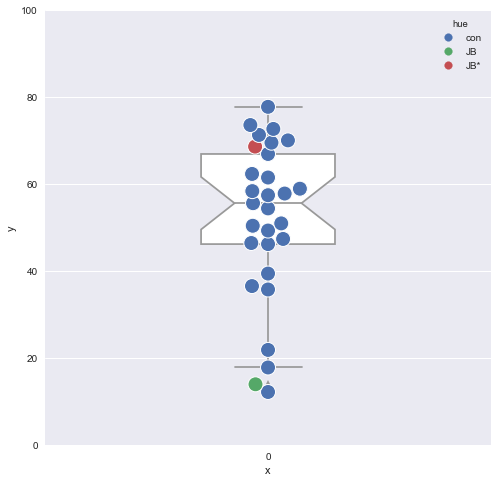

In [70]:
plt.figure(figsize=(8,8))

snsDf = bigDf.copy()
snsDf.columns = ['y']
snsDf['x'] = [0 for x in snsDf.index]
snsDf['hue'] = bigDf.index

sns.swarmplot(data=snsDf,x='x',y='y',hue='hue',size=15,linewidth=1,edgecolor='white')
sns.boxplot(data=snsDf,x='x',y='y',notch=True,color='white',width=0.3)

plt.ylim(0,100)

plt.show()

### relationship between number of famous people known and proportion of correctly named/known

In [118]:
recogDf = pd.read_csv('../famousInner/output/innerName.csv',index_col=[0],header=[0,1])['inner']

In [119]:
recogDf.tail()

,naming
7,66.875000
8,72.631579
9,58.888889
JB,13.913043
JB*,68.571429


In [120]:
knowDf = pd.read_csv('../famousCheck/output/familiarFaces.csv',index_col=[0],header=0)

In [121]:
knowDf.tail()

,known
6,76.190476
7,76.190476
8,90.476190
9,85.714286
jb,88.095238


In [123]:
mergeDf = pd.concat([recogDf,knowDf],axis=1,join='inner')

In [124]:
mergeDf.tail()

,naming,known
5,61.463415,97.619048
6,39.375000,76.190476
7,66.875000,76.190476
8,72.631579,90.476190
9,58.888889,85.714286


In [125]:
mergeDf.shape

(27, 2)

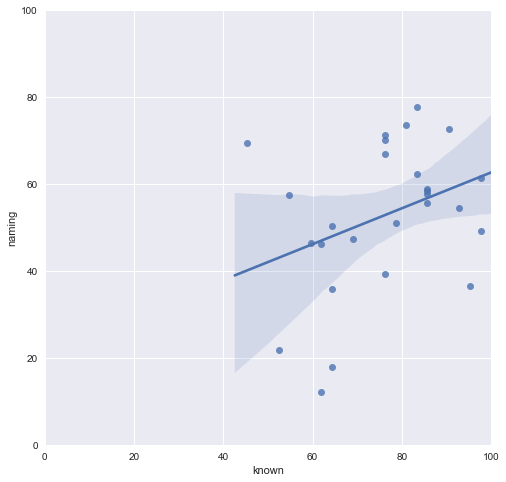

In [128]:
plt.figure(figsize=(8,8))
sns.regplot(data=mergeDf,x='known',y='naming')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()